In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('Apoyo_Lectura/qog_std_cs_jan18.csv')

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (8,6)

import sys
sys.path.insert(0, './Apoyo_Lectura')
import lec4_graphs as gfx

In [23]:
import seaborn as sns

(array([ 5., 12., 21., 15., 14., 18., 31., 27., 19., 24.]),
 array([0.347     , 0.4071    , 0.4672    , 0.5273    , 0.5874    ,
        0.6475    , 0.70760001, 0.76770001, 0.82780001, 0.88790001,
        0.94800001]),
 <a list of 10 Patch objects>)

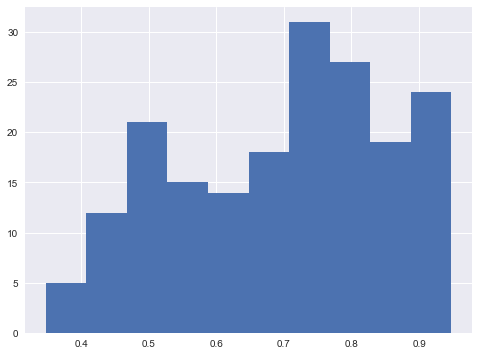

In [24]:
plt.hist(df['undp_hdi'].dropna())

Text(0.5, 1.0, 'Distribución Empírica del IDH')

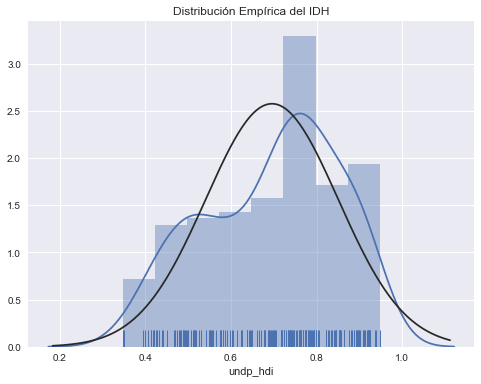

In [25]:
sns.distplot(df['undp_hdi'].dropna(), rug=True, fit=stats.norm)

plt.title('Distribución Empírica del IDH')

In [26]:
df['region_recod'] = df['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                             ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian',
                                              'WesternDem', 'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'
                                             ])

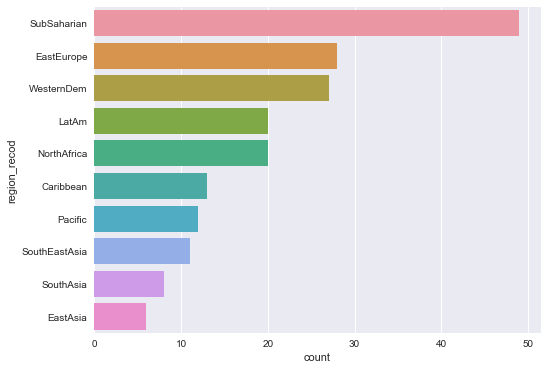

In [27]:
sns.countplot(y=df['region_recod'], order=df['region_recod'].value_counts().index)

In [28]:
df['region_recod'].value_counts()

SubSaharian      49
EastEurope       28
WesternDem       27
LatAm            20
NorthAfrica      20
Caribbean        13
Pacific          12
SouthEastAsia    11
SouthAsia         8
EastAsia          6
Name: region_recod, dtype: int64

In [29]:
df['region_recod'].head()

0      SouthAsia
1     EastEurope
2    NorthAfrica
3     WesternDem
4    SubSaharian
Name: region_recod, dtype: object

In [30]:
df['demo'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia')

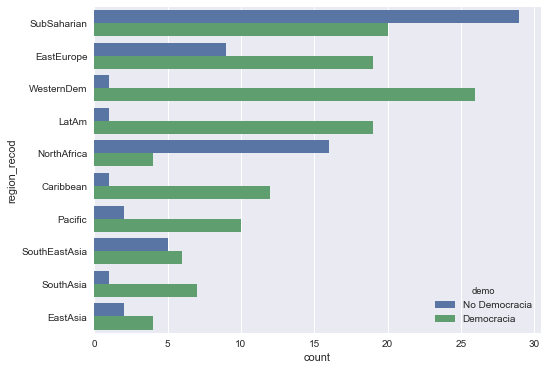

In [31]:
sns.countplot(y=df['region_recod'], hue=df['demo'], order=df['region_recod'].value_counts().index)

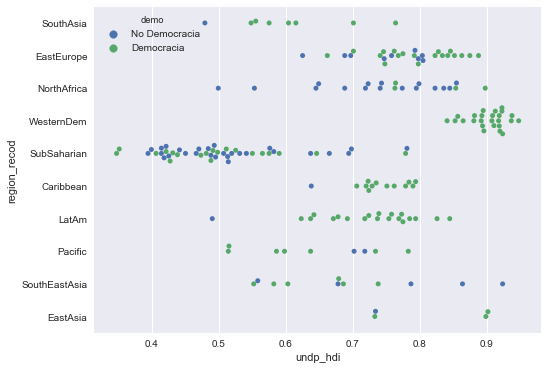

In [32]:
sns.swarmplot(y=df['region_recod'],
              x=df['undp_hdi'],
             hue=df['demo'])

## FaceGrid

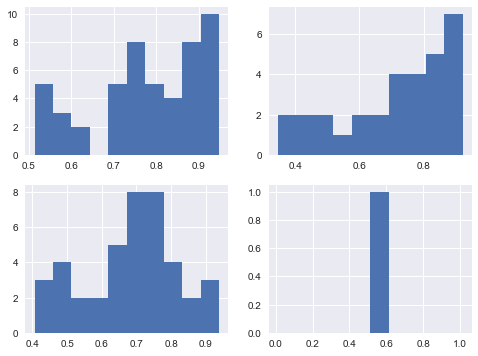

In [33]:
gol_0 = df[df['gol_inst'] == 0.0]['undp_hdi'].dropna()
gol_1 = df[df['gol_inst'] == 1.0]['undp_hdi'].dropna()
gol_2 = df[df['gol_inst'] == 2.0]['undp_hdi'].dropna()
gol_4 = df[df['gol_inst'] == 4.0]['undp_hdi'].dropna()

# generamos dos iterables con enumerate
for i, j in enumerate([gol_0, gol_1, gol_2, gol_4]):
    # asignamos una posición específica en la grilla
    plt.subplot(2, 2, i + 1)
    # generamos el gráfico
    plt.hist(j)

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


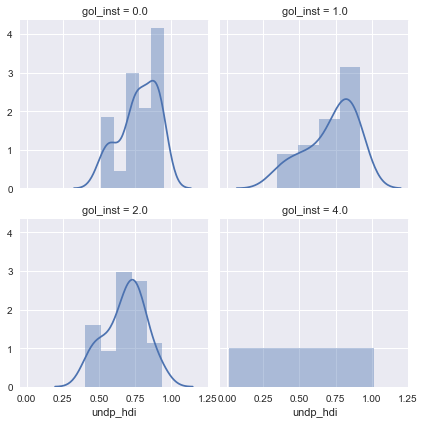

In [34]:
grid = sns.FacetGrid(df, col="gol_inst", col_wrap=2)
grid = grid.map(sns.distplot, 'undp_hdi')

## Scatterplots

Diagramas de dispersión.

Resume el comportamiento de dos variables

Mediante ellos podemos observar "qué tan juntas" viajan dos variables

Text(0.5, 1.0, 'Calidad de Gobierno en Función al IHD')

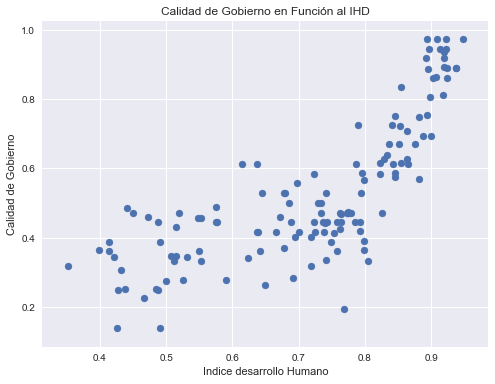

In [35]:
plt.scatter(x=df['undp_hdi'], y=df['icrg_qog'])
plt.xlabel('Indice desarrollo Humano')
plt.ylabel('Calidad de Gobierno')
plt.title('Calidad de Gobierno en Función al IHD')

La variable del eje Y se conoce como variable dependiente

Y la variable del eje X es la que va a evaluar en función
a sus valores

a simple vista el gráfico demuestra que a medida que
se incrementa el indice de desarrollo humano,
la calidad de los gobiernos tambien se incrementa.

Se conoce este comportamiento como directamente proporcional.

Profundizaremos en esto cuando hablemos de corelaciones.


## Agregando etiquetas a un Scatterplot

In [36]:
scatter_data = df.loc[:, ['undp_hdi', 'icrg_qog', 'ccodealp']].dropna()

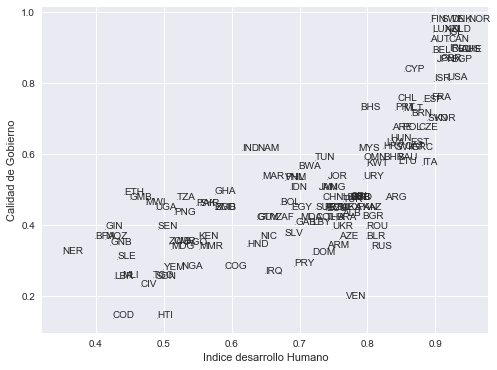

In [39]:
# Definimos un canvas
# fig es la figura completa
# ax es cada uno de los elementos especificos
fig, ax = plt.subplots()

# x: es el indice de desarrollo humano
# y: es la calidad de gobierno
# marker: es para evitar que se visualicen muy fuerte los datos
# un punto es mucho más liviano
# s: es el tamaño de cada elemento
ax.scatter(x=scatter_data['undp_hdi'],
          y=scatter_data['icrg_qog'],
          marker='.', s=1)
plt.xlabel('Indice desarrollo Humano')
plt.ylabel('Calidad de Gobierno')

# Incorporar las etiquetas
for i in scatter_data.index:
    # 1er arg es eje X,
    # 2do arg el eje y,
    # 3r arg el texto
    ax.text(scatter_data.loc[i, 'undp_hdi'],
            scatter_data.loc[i, 'icrg_qog'],
            str(scatter_data.loc[i, 'ccodealp']))

In [40]:
df.shape

(194, 1884)

In [41]:
df.head().shape

(5, 1884)

## Agregando recta a un Scatterplot

Agregar una recta de tendencia, sirve para ver el ajuste
e indique como funciona la relacion entre ambas variables

Debemos encontrar la pendiente y el intercepto

In [43]:
pendiente, intercepto = np.polyfit(scatter_data['undp_hdi'],
                                   scatter_data['icrg_qog'],
                                  1)

In [44]:
pendiente

1.0077917998503934

In [45]:
intercepto

-0.1954107728917399

In [46]:
linear_fit = [pendiente * j + intercepto for j in scatter_data['undp_hdi']]

Esto es la ecuación de la recta

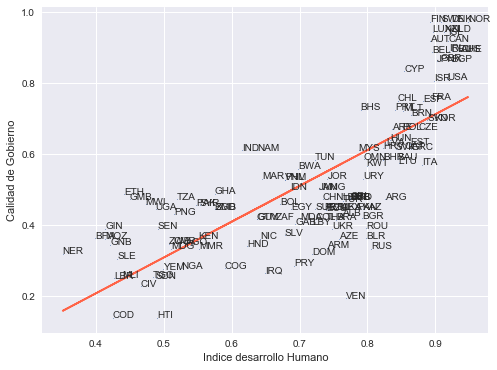

In [47]:
# Definimos un canvas
# fig es la figura completa
# ax es cada uno de los elementos especificos
fig, ax = plt.subplots()

# x: es el indice de desarrollo humano
# y: es la calidad de gobierno
# marker: es para evitar que se visualicen muy fuerte los datos
# un punto es mucho más liviano
# s: es el tamaño de cada elemento
ax.scatter(x=scatter_data['undp_hdi'],
          y=scatter_data['icrg_qog'],
          marker='.', s=1)
plt.xlabel('Indice desarrollo Humano')
plt.ylabel('Calidad de Gobierno')
ax.plot(scatter_data['undp_hdi'], linear_fit, color='tomato')

# Incorporar las etiquetas
for i in scatter_data.index:
    # 1er arg es eje X,
    # 2do arg el eje y,
    # 3r arg el texto
    ax.text(scatter_data.loc[i, 'undp_hdi'],
            scatter_data.loc[i, 'icrg_qog'],
            str(scatter_data.loc[i, 'ccodealp']))

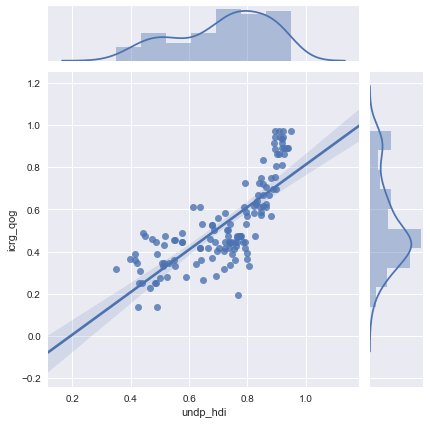

In [51]:
sns.jointplot(scatter_data['undp_hdi'],
              scatter_data['icrg_qog'],
             kind='reg')

Los histogramas laterales se conocen como distribuciones marginales

Con esta información podemos empezar a hablar de corelaciones

## Correlación

Es pariente de la covarianza.

Son piedras angulares para métodos más sofisticados.

$Covarianza(x,y) = \frac{1}{N - 1}\sum_{i=1}^{N} \left(X_i - \bar{X}\right)\cdot\left(Y_i - \bar{Y}\right)$

$Correlacion(x,y) = \frac{Covarianza(x,y)}{\sqrt[]{Varianza(x)}\sqrt[]{Varianza(y)}}$

El obejetivo de ambas es cuantificar el grado en que dos variables
viajan juntas.

Hay disciplinas que consideran la covarianza un indicador importante

Para el curso asumimos que es un estadistico procedimental
dado que la covarianza tiene limites infinitos, que dificulta
su interpretacion y comparación entre indicadores

y para resolver el problema de los limites infinitos de la covarianza
se usa la correlacion, restringe los límetes entre -1 y 1



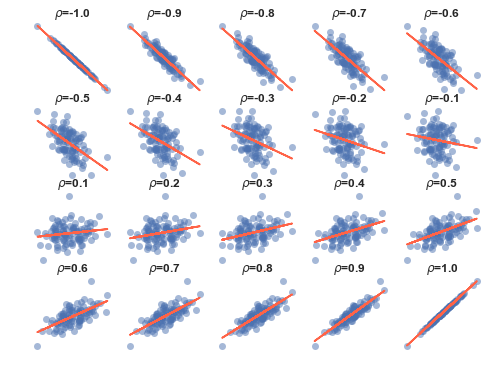

In [55]:
gfx.generate_corr_matrix()

En los valores negativos de correlación encontramos:
    
* El 1er elemento indica que en la medida que los valores tienden a ser negativos
esperamos que cuando una aumenta (la x) los valores de
y van disminuyendo. Esto nos dice que son inversamente
proporcionales

*El 2do elemento es que tanto acople tienen los datos
respecto a la recta calculada.

Cuando las correlaciones tienden a tener menores valores
significa 2 fenómenos:
    
    1. la pendiente de la curva va a ser menos pronunciada (grafico -0.5 al -0.1)

    2. la nube de los datos se va a acoplar de menor manera a la recta

En los valores positivos de correlación encontramos:
    
* En la medida que los valores x van aumentando
los valores de y tambien aumentan, por ejemplo,
en nuestra grafica de Indice de desarrollo humano
y calidad de gobierno.  Cómo podemos obtener la crifa exacta?


In [61]:
scatter_data['undp_hdi'].corr(scatter_data['icrg_qog'])

0.7694078965882

como la correlacion es positiva,
nos indica que ambas variables viajan juntas,
en la medida que hay valores mas grandes del
indice de desarrollo humano, voy a obtener mayores valores de calidad de
gobierno.

Esto indica que la correlacion es de un 76%, por sobre 1
significa que estan asociados perfectamente

La correlación no implica causalidad

No definimos un efecto de cómo X afecta mi Y

Se puede aplicar para variables numéricas y categóricas

## Reporte de correlación

In [135]:
wvs_subset = df.filter(regex='wvs_conf*').dropna()

In [137]:
wvs_subset.corr()

,wvs_confaf,wvs_confch,wvs_confcs,wvs_confenv,wvs_confgov,wvs_confjs,wvs_conflu,wvs_confpar,wvs_confpol,wvs_confpp,wvs_confpr,wvs_conftv,wvs_confun
wvs_confaf,1.000000,0.331289,0.632955,0.191708,0.539076,0.603475,0.429213,0.461554,0.495793,0.433317,0.380856,0.393870,0.253356
wvs_confch,0.331289,1.000000,0.128526,0.123436,0.098111,0.021361,0.145398,0.008904,-0.206500,0.071517,0.238694,0.298447,0.010541
wvs_confcs,0.632955,0.128526,1.000000,0.518017,0.771648,0.795691,0.872042,0.847592,0.593276,0.809296,0.733149,0.723421,0.595613
wvs_confenv,0.191708,0.123436,0.518017,1.000000,0.526552,0.415506,0.601539,0.594918,0.323091,0.584604,0.653851,0.578776,0.778747
wvs_confgov,0.539076,0.098111,0.771648,0.526552,1.000000,0.691203,0.741203,0.902106,0.526431,0.866313,0.723991,0.721074,0.514832
wvs_confjs,0.603475,0.021361,0.795691,0.415506,0.691203,1.000000,0.721389,0.693953,0.806605,0.606416,0.539229,0.545928,0.306461
wvs_conflu,0.429213,0.145398,0.872042,0.601539,0.741203,0.721389,1.000000,0.824853,0.497486,0.821691,0.847822,0.851007,0.610956
wvs_confpar,0.461554,0.008904,0.847592,0.594918,0.902106,0.693953,0.824853,1.000000,0.503028,0.963128,0.809282,0.789024,0.687792
wvs_confpol,0.495793,-0.206500,0.593276,0.323091,0.526431,0.806605,0.497486,0.503028,1.000000,0.379890,0.315123,0.304618,0.211052
wvs_confpp,0.433317,0.071517,0.809296,0.584604,0.866313,0.606416,0.821691,0.963128,0.379890,1.000000,0.816111,0.787537,0.716244


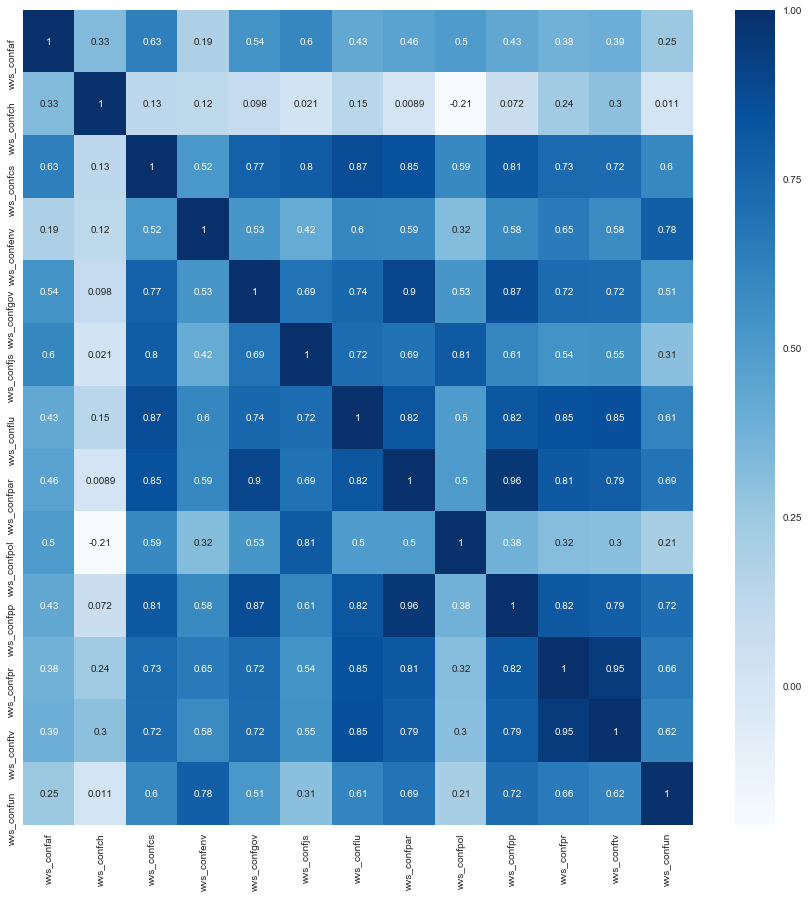

In [139]:
plt.figure(figsize=(15, 15))
sns.heatmap(wvs_subset.corr(), cmap='Blues', annot=True)

la baja magnitud de correlaciones indica que
a nivel mundial la asociacion entre la confianza
de la iglesia catolica, no se condice con la
confianza entre otras instituciones

La correlación entre las fuerzar armadas y poder judicial es 0.6
esperamos una nube de datos directamente proporcional.

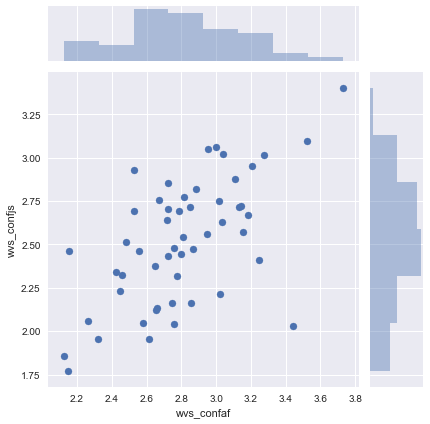

In [140]:
sns.jointplot(wvs_subset['wvs_confaf'], wvs_subset['wvs_confjs'])

Estas variables tienen a viajar juntas

# otra forma de demostrar correlación

In [ ]:
grid = sns.PairGrid(wvs_subset)
grid = grid.map_diag(sns.distplot)
grid = grid.map_upper(sns.regplot,
                      lowess=True,
                      scatter_kws={'alpha': 0.5},
                      line_kws={'color': 'tomato'})
grid = grid.map_lower(sns.kdeplot,
                     cmap='Blues_d')

## Clases del Profe Alex

In [63]:
datos = pd.Series([42, 47, 53, 47, 50, 45, 46, 48, 41, 49, 45, 40, 54])

In [67]:
media = datos.mean()
media

46.69230769230769

In [68]:
mediana = datos.median()
mediana

47.0

In [66]:
from scipy import stats

In [74]:
moda = stats.mode(datos)
moda

ModeResult(mode=array([45]), count=array([2]))

In [79]:
data = {
    'x': [0, 1, 2, 3, 4, 5, 6, 7],
    'f': [5, 12, 10, 8, 6, 4, 3, 2]
}

In [81]:
hermanos_df = pd.DataFrame.from_dict(data)

In [83]:
hermanos_df.head()

,x,f
0,0,5
1,1,12
2,2,10
3,3,8
4,4,6


In [85]:
hermanos_df['x*f'] = hermanos_df['x'] * hermanos_df['f']

In [86]:
hermanos_df

,x,f,x*f
0,0,5,0
1,1,12,12
2,2,10,20
3,3,8,24
4,4,6,24
5,5,4,20
6,6,3,18
7,7,2,14


In [96]:
F = 0

In [97]:
def calculate_F(f):
    global F
    F = F + f
    return F

In [98]:
hermanos_df['F'] = hermanos_df['f'].apply(calculate_F)

In [100]:
hermanos_df = hermanos_df[['x', 'f', 'F', 'x*f']]

In [101]:
hermanos_df

,x,f,F,x*f
0,0,5,5,0
1,1,12,17,12
2,2,10,27,20
3,3,8,35,24
4,4,6,41,24
5,5,4,45,20
6,6,3,48,18
7,7,2,50,14


In [134]:
hermanos_media = sum(hermanos_df['x*f'])/50
hermanos_media

2.64

In [119]:
pos_median = sum(hermanos_df['f']) / 2
pos_median

25.0

In [120]:
hermanos_mediana = 2

In [121]:
hermanos_df['f'].max()

12

In [122]:
moda = 1

In [123]:
hermanos_df['f'].mean()

6.25

In [127]:
hermanos_df['Px'] = hermanos_df['f']/sum(hermanos_df['f'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
hermanos_df

,x,f,F,x*f,Px
0,0,5,5,0,0.10
1,1,12,17,12,0.24
2,2,10,27,20,0.20
3,3,8,35,24,0.16
4,4,6,41,24,0.12
5,5,4,45,20,0.08
6,6,3,48,18,0.06
7,7,2,50,14,0.04
